# Import the librarires

In [499]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# Import the dataset

In [500]:
url = 'https://raw.githubusercontent.com/******/GoogleAppRating-DataAnalysis/master/googleplaystore.csv'
res = requests.get(url, allow_redirects=True)

In [501]:
with open('googleplaystore.csv', 'wb') as file:
    file.write(res.content)
uncleaned_data = pd.read_csv('googleplaystore.csv')

In [502]:
uncleaned_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Dataset info

In [503]:
uncleaned_data.shape

(10841, 13)

In [504]:
uncleaned_data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [505]:
# reviews, price, installs do not have the correct datatype

In [506]:
# summary statistics
uncleaned_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# Clear the data

### Examine the Rating column

In [507]:
uncleaned_data['Rating'].nunique()
# this column has 40 unique values

40

In [508]:
uncleaned_data['Rating'].unique()
# there is an outlier, we can see this at boxplot

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

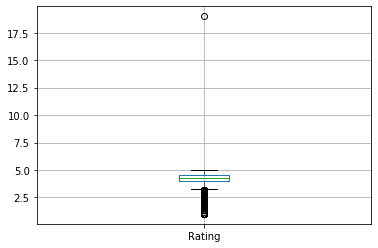

In [509]:
# boxplot of Rating column
uncleaned_data.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000196ACD3C988>]],
      dtype=object)

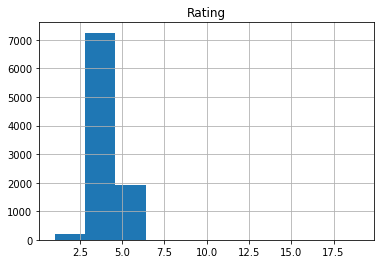

In [510]:
uncleaned_data.hist()
# right skewd

In [511]:
uncleaned_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [512]:
percent_missing = 100 * uncleaned_data.isnull().sum() / len(uncleaned_data)
round(percent_missing, 2)

App                0.00
Category           0.00
Rating            13.60
Reviews            0.00
Size               0.00
Installs           0.00
Type               0.01
Price              0.00
Content Rating     0.01
Genres             0.00
Last Updated       0.00
Current Ver        0.07
Android Ver        0.03
dtype: float64

In [513]:
# I will fill the null values of Rating with median and the null values of categorical columns with mode

In [514]:
uncleaned_data['Rating'] = uncleaned_data['Rating'].fillna((uncleaned_data['Rating'].median()))

In [515]:
uncleaned_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

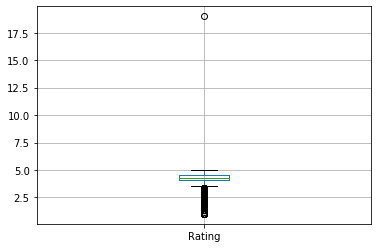

In [516]:
uncleaned_data.boxplot()
# there is an outlier and I will remove it as the rating can not be more than 5

In [517]:
uncleaned_data[uncleaned_data['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [518]:
uncleaned_data = uncleaned_data.drop(index=10472)
uncleaned_data.shape

(10840, 13)

In [519]:
print(uncleaned_data['Type'].mode())
print(uncleaned_data['Content Rating'].mode())
print(uncleaned_data['Current Ver'].mode())
print(uncleaned_data['Android Ver'].mode())

0    Free
dtype: object
0    Everyone
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [520]:
uncleaned_data['Type'].fillna(uncleaned_data['Type'].mode()[0], inplace=True)
uncleaned_data['Content Rating'].fillna(uncleaned_data['Content Rating'].mode()[0], inplace=True)
uncleaned_data['Current Ver'].fillna(uncleaned_data['Current Ver'].mode()[0], inplace=True)
uncleaned_data['Android Ver'].fillna(uncleaned_data['Android Ver'].mode()[0], inplace=True)

In [521]:
uncleaned_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### Convert Price, Reviews and Installs into numerical values

In [522]:
uncleaned_data['Price'] = uncleaned_data['Price'].apply(lambda x: str(x).replace('$',"") if '$' in str(x) else str(x))
uncleaned_data['Price'] = uncleaned_data['Price'].apply(lambda x: float(x))

In [523]:
uncleaned_data['Reviews'] = uncleaned_data['Reviews'].apply(lambda x: int(x))

In [524]:
uncleaned_data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [525]:
uncleaned_data['Installs'] = uncleaned_data['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
uncleaned_data['Installs'] = uncleaned_data['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))

In [526]:
uncleaned_data['Installs'] = uncleaned_data['Installs'].apply(lambda x: int(x))

In [527]:
uncleaned_data.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [528]:
uncleaned_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [529]:
# dataset statistics
uncleaned_data.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


## Copy the new cleaned data frame

In [530]:
cleaned_data = uncleaned_data.copy()

## Change the name of some columns

In [531]:
cleaned_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [532]:
cleaned_data = cleaned_data.rename(columns={'Reviews': 'NumReviews', 'Content Rating': 'ContentRating', 'Last Updated': 'LastUpdated',
                                            'Current Ver': 'CurrentVer', 'Android Ver': 'AndroidVer'})
cleaned_data.columns

Index(['App', 'Category', 'Rating', 'NumReviews', 'Size', 'Installs', 'Type',
       'Price', 'ContentRating', 'Genres', 'LastUpdated', 'CurrentVer',
       'AndroidVer'],
      dtype='object')

## Correlation

### Correleation (Numeric Values)

In [533]:
cleaned_data.corr()

,Rating,NumReviews,Installs,Price
Rating,1.000000,0.063166,0.045496,-0.019318
NumReviews,0.063166,1.000000,0.643122,-0.009667
Installs,0.045496,0.643122,1.000000,-0.011689
Price,-0.019318,-0.009667,-0.011689,1.000000


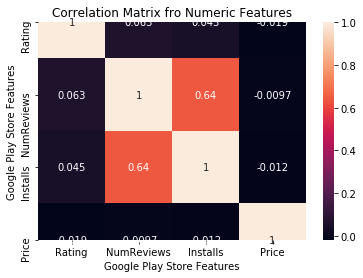

In [534]:
sns.heatmap(cleaned_data.corr(), annot=True)

plt.title('Correlation Matrix fro Numeric Features')
plt.xlabel('Google Play Store Features')
plt.ylabel('Google Play Store Features')
plt.show()

In [535]:
# NumReviews and Installs are highly correlated

### Correlation (Non NUmeric Values) 

In [536]:
# I have to numerize the non numerical fields

df_numerized = cleaned_data.copy()

for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

In [537]:
df_numerized.head()

,App,Category,Rating,NumReviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer
0,6962,0,4.1,159,53,10000,0,0.0,1,9,560,114,15
1,2632,0,3.9,967,27,500000,0,0.0,1,12,480,996,15
2,8656,0,4.7,87510,366,5000000,0,0.0,1,9,115,458,15
3,7827,0,4.5,215644,99,50000000,0,0.0,4,9,823,2716,18
4,7022,0,4.3,967,62,100000,0,0.0,1,11,755,272,20


In [538]:
df_numerized.corr()

,App,Category,Rating,NumReviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer
App,1.000000,0.019462,0.026873,0.035028,0.083168,0.056880,0.008183,0.011940,0.054309,0.019842,-0.045496,0.079409,0.093332
Category,0.019462,1.000000,-0.033509,0.002162,0.003334,0.022532,0.018194,-0.011941,-0.093125,0.790600,-0.029918,0.098671,0.097780
Rating,0.026873,-0.033509,1.000000,0.063166,0.063545,0.045496,0.039095,-0.019318,0.014232,-0.045049,-0.066160,0.030160,0.063031
NumReviews,0.035028,0.002162,0.063166,1.000000,0.158332,0.643122,-0.041699,-0.009667,0.069963,-0.010801,-0.059140,0.115922,0.125910
Size,0.083168,0.003334,0.063545,0.158332,1.000000,0.182831,-0.040532,-0.021956,0.063176,0.003407,-0.078305,0.410067,0.472561
Installs,0.056880,0.022532,0.045496,0.643122,0.182831,1.000000,-0.051038,-0.011689,0.054431,-0.008441,-0.087574,0.168337,0.190445
Type,0.008183,0.018194,0.039095,-0.041699,-0.040532,-0.051038,1.000000,0.228200,-0.050162,-0.000771,0.017780,-0.070873,-0.103899
Price,0.011940,-0.011941,-0.019318,-0.009667,-0.021956,-0.011689,0.228200,1.000000,-0.016196,-0.003884,0.012879,-0.032937,-0.013597
ContentRating,0.054309,-0.093125,0.014232,0.069963,0.063176,0.054431,-0.050162,-0.016196,1.000000,-0.127500,-0.036153,0.023440,0.022473
Genres,0.019842,0.790600,-0.045049,-0.010801,0.003407,-0.008441,-0.000771,-0.003884,-0.127500,1.000000,-0.037715,0.099641,0.104356


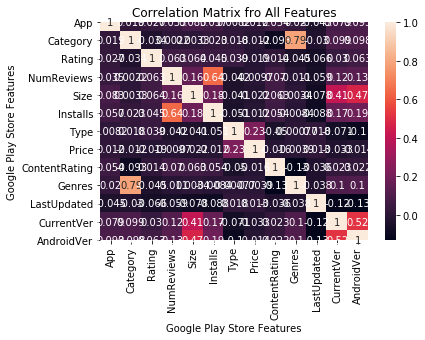

In [539]:
sns.heatmap(df_numerized.corr(), annot=True)

plt.title('Correlation Matrix fro All Features')
plt.xlabel('Google Play Store Features')
plt.ylabel('Google Play Store Features')
plt.show()

In [540]:
# There is a high correlation between Ctegory and Genres

## Drop the column I will not use in visualizations

In [541]:
# I will drop the columns : LastUpdated, CurrentVer and AndroidVer and Genres, because we take the same information from Category

In [542]:
cleaned_data.drop('LastUpdated', axis=1, inplace=True)
cleaned_data.head()

,App,Category,Rating,NumReviews,Size,Installs,Type,Price,ContentRating,Genres,CurrentVer,AndroidVer
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up


In [543]:
cleaned_data.drop('CurrentVer', axis=1, inplace=True)
cleaned_data.drop('AndroidVer', axis=1, inplace=True)
cleaned_data.head()

,App,Category,Rating,NumReviews,Size,Installs,Type,Price,ContentRating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity


In [544]:
cleaned_data.drop('Genres', axis=1, inplace=True)
cleaned_data.head()

,App,Category,Rating,NumReviews,Size,Installs,Type,Price,ContentRating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone


In [545]:
# rename the type column
cleaned_data = cleaned_data.rename(columns={'Type':'Charge'})

# Connect python to my database and create a table with the values of my DataFrame

### Import the relevant library

In [546]:
import pymysql

In [547]:
# This will help me to create my table in MySQL Workbench
measurer = np.vectorize(len)
res1 = measurer(cleaned_data.values.astype(str)).max(axis=0)
res1

array([194,  19,   3,   8,  18,  10,   4,   6,  15])

### Create a connection and Cursor

In [548]:
conn = pymysql.connect(database='google_db', user='root', password='*******')

In [549]:
cursor = conn.cursor()

#### Chech the connection

In [550]:
cursor.execute('SELECT * FROM google_data;')

0

## Create the INSERT statement

In [551]:
insert_query = 'INSERT INTO google_data VALUES'
insert_query

'INSERT INTO google_data VALUES'

In [552]:
# for i in range(cleaned_data.shape[0]):
#     insert_query += '('
#     for j in range(cleaned_data.shape[1]):
#         insert_query += str(cleaned_data[cleaned_data.columns.values[j]][i]) + ', '
#     insert_query = insert_query[:-2] + '), '

# It did not work that way

In [553]:
cols = "`,`".join([str(i) for i in cleaned_data.columns.tolist()])

In [554]:
for i,row in cleaned_data.iterrows():
    sql = "INSERT INTO google_data (`" +cols + "`) VALUES (" + "%s,"*(len(row)-1) + "%s)"
    cursor.execute(sql, tuple(row))

In [555]:
conn.commit()

In [556]:
sql = "SELECT * FROM google_data"
cursor.execute(sql)

10840

In [557]:
conn.close()